<a href="https://colab.research.google.com/github/dissonpontes/Exercicios_do_Bootcamp_DS/blob/main/Exerc%C3%ADcios_Workshop_Pandas_por_dissonpontes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Olá! Meu nome é **Anderson Pontes**. 

Sou de Fortaleza, Ceará e estou estudando para ser um cientista de dados. 

Sempre tive paixão por análise de dados, e depois de estudar outras coisas como Química e Fìsica (graduação e mestrado, respectivamente) creio que tenho uma visão analítica que foi melhorada com o workshop!

Minhas redes sociais:

*   Linkedin: https://www.linkedin.com/in/dissonpontes/
*   Github: https://github.com/dissonpontes
*   Instagram: https://www.instagram.com/dissonpontes

Nesse exercício, tomei a liberdade de fazer alterações em algumas células. Indicarei onde estarei fazendo tais mudanças.

# **Atividade: Workshop Excel ao Pandas**

O notebook a seguir é referente aos exercícios a serem realizados após o workshop de Pandas. 

**Antes de realizar a sua atividade, clique File > Save a Copy in Drive (Salvar uma Cópia no Drive)**

Você faz parte de uma consultoria de negócios e foi contratado pela *Bikes S.A* para realizar uma breve análise dos negócios e responder a algumas questões, desenvolvendo a estratégia de negócios para a próxima temporada 

### **Exercício 1**
Vamos carregar nosso dataset e entender um pouco sobre ele. 

In [ ]:
# Importe o pacote Pandas para a sessão (Lembre-se que, caso precise instalar, use o comando !pip install nome-do-pacote)
import pandas as pd
import seaborn as sns

Aqui, preferi fazer a importação do arquivo csv direto do google colab. Então essa próxima célula no meu caso será ignorada

In [ ]:
# Carregue o dataset

# Importar o arquivo do seu computador para o Google Colab
from google.colab import files
uploaded = files.upload() 

Estava encontrando um erro de encoding do arquivo. Para descobrir qual o encoding necessário, utilizei a biblioteca **chardet**

In [ ]:
import chardet    
rawdata = open('SeoulBikeData.csv', 'rb').read()
result = chardet.detect(rawdata)
charenc = result['encoding']
print(charenc)

ISO-8859-1


Agora, de posse do encoding do arquivo, posso carregar meu data frame corretamente

In [ ]:
# Importar o arquivo do Google Colab para o notebook
df = pd.read_csv('SeoulBikeData.csv', encoding = 'ISO-8859-1')

In [ ]:
# Verifique as primeiras 5 linhas com o método head
df.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# Verifique o tipo de arquivo importado
#ainda_nao_sei, provavelmente preciso usar a bibliotea IO

In [ ]:
# Verifique as informações (info) do arquivo importado
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
# Verificando o shape do data frame, ou seja, o número de colunas e o número de linhas.
df.shape

(8760, 14)

In [ ]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
Year                         0
Month                        0
dtype: int64

De acordo com as informações acima, podemos ver que possuimos um total de 8760 linhas com dados distribuídas em 14 colunas diferentes. 

Geralmente, precisaríamos verificar se nosso dataframe possui valores nulos ou vazios. Mas, pelas informações obtidas na função **info()**, percebemos que todas as colunas possuem 8760 dados não-nulos, de um total de 8760 linhas de dados, confirmado pelo trecho de código **df.isna().sum()**

**Execute a célula abaixo antes de seguir para o próximo exercício**

In [ ]:
# Apenas execute esta célula para criar duas novas colunas com mês e ano.
df['Date'] = pd.to_datetime(df.Date)
df['Year'] = df.Date.dt.year
df['Month'] = df.Date.dt.month

### **Exercício 2**
Agora que sabemos um pouco mais sobre nosso dataset, vamos extrair alguns insights dos dados.

In [ ]:
# Visualizando a tabela
df.head(2)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1


In [ ]:
# Visualizar a estatística descritiva dos dados nos ajuda a ter uma idéia geral sobre o conjunto de dados
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Year,Month
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,2017.915068,6.526027
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,0.278796,3.448048
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,2017.000000,1.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,2018.000000,4.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,2018.000000,7.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,2018.000000,10.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,2018.000000,12.000000


In [ ]:
# Agrupe a tabela por ano e faça a soma das vendas por ano
group = df.groupby('Year')['Rented Bike Count'].sum()
print("As vendas no ano de {} foi {} e as vendas no ano de {} foi {}".format(group.index[0], group.values[0], group.index[1], group.values[1]))

As vendas no ano de 2017 foi 185330 e as vendas no ano de 2018 foi 5986984


In [ ]:
# Agrupe a tabela por Estação (Seasons) e faça a soma das vendas por estação
group2 = df.groupby('Seasons')[['Rented Bike Count']].sum()
group2.sort_values(by='Rented Bike Count')

,Rented Bike Count
Seasons,
Winter,487169
Spring,1611909
Autumn,1790002
Summer,2283234


Percebemos que o verão tem a maior quantidade de vendas acumuladas enquanto o inverno possui a menor quantidade de vendas acumuladas. Isso faz sentido, porque no inverno as pessoas tem a tendência de ficar dentro de casa ou preferir transportes que possam ser aquecidos

In [ ]:
# Agrupe a tabela por Mês e tire a média (mean) das vendas por mês
group3 = df.groupby('Month')[['Rented Bike Count']].mean().round(2)
group3.sort_values(by='Rented Bike Count')

,Rented Bike Count
Month,
1,386.08
2,393.02
12,419.05
3,611.61
11,685.29
9,693.51
4,772.53
8,825.52
10,842.73


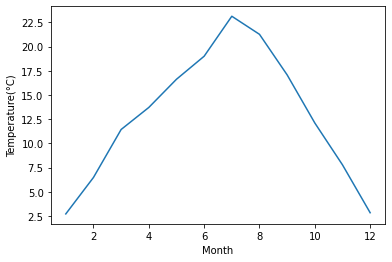

In [ ]:
group4 = df.groupby('Month')[['Temperature(°C)']].mean()
sns.lineplot(x='Month', y='Temperature(°C)', data=group4)

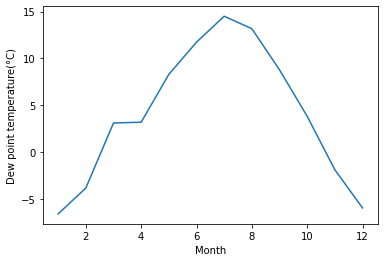

In [ ]:
group5 = df.groupby('Month')[['Dew point temperature(°C)']].mean()
sns.lineplot(x='Month', y='Dew point temperature(°C)', data=group5)

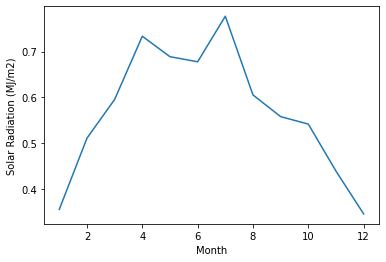

In [ ]:
group6 = df.groupby('Month')[['Solar Radiation (MJ/m2)']].mean()
sns.lineplot(x='Month', y='Solar Radiation (MJ/m2)', data=group6)

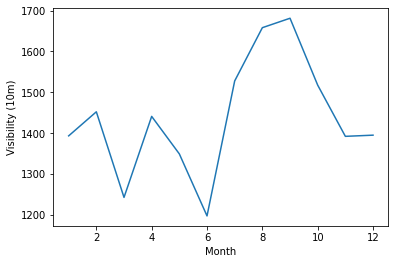

In [ ]:
group7 = df.groupby('Month')[['Visibility (10m)']].mean()
sns.lineplot(x='Month', y='Visibility (10m)', data=group7)

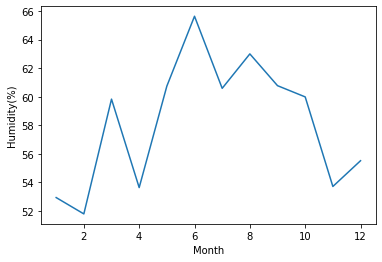

In [ ]:
group8 = df.groupby('Month')[['Humidity(%)']].mean()
sns.lineplot(x='Month', y='Humidity(%)', data=group8)

### **Comente quais foram os insights que você pôde perceber nesses números?**
* Estamos em tendência de alta ou baixa?

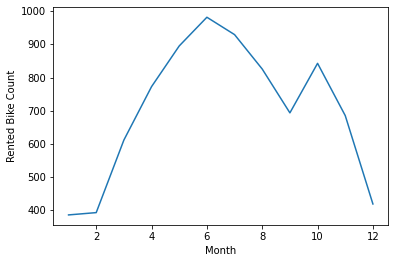

In [ ]:
sns.lineplot(x='Month', y='Rented Bike Count', data=group3)

*Resposta:* De acordo com o gráfico de linha acima, geralmente utilizado para avaliar tendência, temos que há uma tendência de crescimento entre os meses 1-6 (final do inverno e começo da primavera até o verão), seguida por uma tendência de queda nos meses 7-12 (final do outono ao inverno). [Referência](https://www.ef.com.br/guia-destinos/coreia-do-sul/clima/). 

* Qual é a melhor estação?

In [ ]:
group2.sort_values(by='Rented Bike Count')

,Rented Bike Count
Seasons,
Winter,487169
Spring,1611909
Autumn,1790002
Summer,2283234


O verão é a estação do ano que possui o maior número de alugueis acumulados

* Qual mês, em média, é melhor?

In [ ]:
group3.sort_values(by='Rented Bike Count')

,Rented Bike Count
Month,
1,386.08
2,393.02
12,419.05
3,611.61
11,685.29
9,693.51
4,772.53
8,825.52
10,842.73


De acordo com a tendência de aluguéis, o mês de junho (6) possui a maior quantidade de aluguéis acumulados

### **Exercício 3**
Vamos criar algumas visualizações gráficas com o Pandas

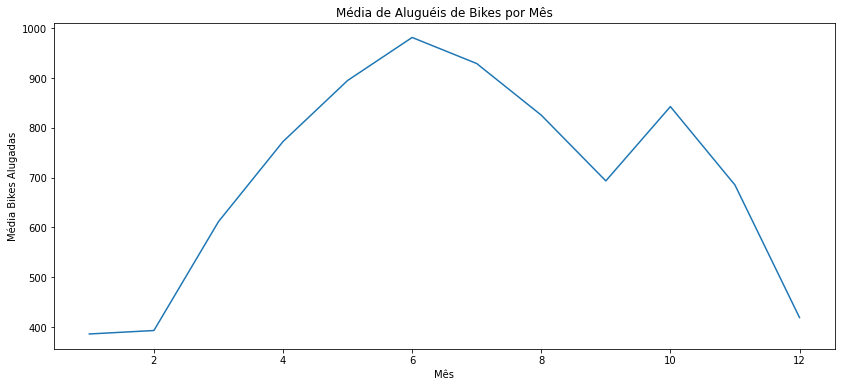

In [ ]:
# Faça um gráfico (plot) em linha do agrupamento de Bikes alugadas por mês usando a média (mean) como função de agregação
df.groupby('Month')['Rented Bike Count'].mean().plot(title='Média de Aluguéis de Bikes por Mês',
                                                  xlabel='Mês', 
                                                  ylabel='Média Bikes Alugadas',
                                                  figsize=(14,6));

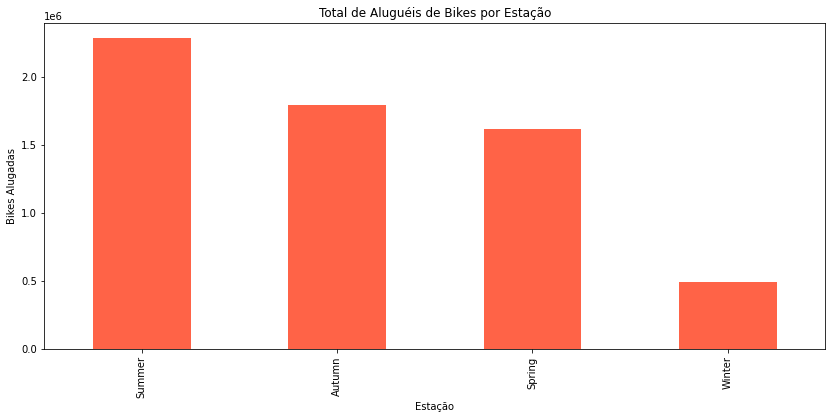

In [ ]:
# Faça um gráfico (plot) em barras do agrupamento de Bikes alugadas por Season usando a Soma como função de agregação

# Criando uma variável com o agrupamento e organizando os dados do maior para o menor (Caso queira ver o resultado do agrupamento, execute agg_by_season em uma célula separada)
agg_by_season = df.groupby('Seasons')['Rented Bike Count'].sum().sort_values(ascending=False)

# Criar o gráfico de barras
agg_by_season.plot.bar(title='Total de Aluguéis de Bikes por Estação',
                                                  xlabel='Estação', 
                                                  ylabel='Bikes Alugadas',
                                                  figsize=(14,6),
                                                  color='tomato');

### **Exercício 4**
Em nosso último exercício, vou propor um desafio.

A **correlação** é uma medida estatística que consegue medir qual é a força da relação entre duas variáveis numéricas. Deste modo, é possível medir quais são as variáveis do nosso dataset que mais influenciam o aluguel de Bikes.

[A *correlação* é um número que varia entre 1 e -1](https://pt.wikipedia.org/wiki/Correla%C3%A7%C3%A3o). Sempre que este número se aproxima dos extremos 1 ou -1, dizemos que a relação é mais forte entre as variáveis, sendo 1 uma correlação positiva onde a variável A aumenta, B também aumenta e -1 é uma correlação negativa, quando A aumenta e B diminui.

As correlações são mais fracas quanto mais o número se aproxima de zero.

Tendo a documentação do método [df.corr( )](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html), calcule a correlação entre as variáveis e determine quais podem afetar as vendas do nosso cliente.

In [ ]:
correlacao = df.corr(method='pearson')
correlacao['Rented Bike Count']

Rented Bike Count            1.000000
Hour                         0.410257
Temperature(°C)              0.538558
Humidity(%)                 -0.199780
Wind speed (m/s)             0.121108
Visibility (10m)             0.199280
Dew point temperature(°C)    0.379788
Solar Radiation (MJ/m2)      0.261837
Rainfall(mm)                -0.123074
Snowfall (cm)               -0.141804
Year                         0.215162
Month                        0.070861
Name: Rented Bike Count, dtype: float64

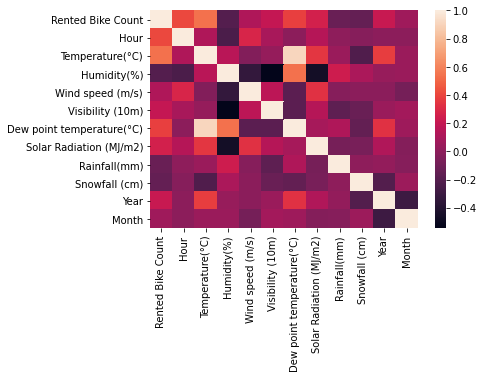

In [ ]:
# Para visualizar o mapa de calor, basta executar o código abaixo
import seaborn as sns
sns.heatmap(correlacao)

## **Qual seria a estratégia que você apresentaria ao cliente?**
* Em quais meses ele deve investir mais ou menos?
* Quais os melhores meses para criar promoções?
* Que variáveis podem afetar mais as vendas do cliente?

Escreva a sua resposta em um parágrafo explicando as suas ações embasadas nos dados coletados das respostas ou de suas próprias análises.

**Sua resposta aqui**

De acordo com os dados apresentados no dataset, podemos perceber que há uma correlação moderada entre temperatura e o número de aluguéis de bicicletas. Essa correlação fica mais intensa nos meses de junho, julho e agosto, onde a umidade do ar e o ponto de orvalho também tem uma tendência de crescimento. O ponto de orvalho indica um conforto térmico nesses três meses, o que também pode indicar um maior [conforto térmico](https://pt.wikipedia.org/wiki/Ponto_de_orvalho#Relação_com_a_sensação_de_conforto_e_desconforto) durante esses meses. 

É correto então, indicar que os melhores meses para investimento são os meses de junho, julho e agosto, onde a demanda por biciletas tende a aumentar. 

De forma semelhante, podemos afirmar que os meses que envolvem o outono e inverno são os meses com menor número de aluguéis, uma vez que a temperatura ambiente fica muito baixa pra níveis de conforto humano favoráveis. Então, os meses de setembro, outubro, novembro, dezembro, janeiro e fevereiro são os meses mais indicados para realização de campanhas promocionais, no intuito de incentivar os clientes a alugarem mais bicicletas.